In [38]:
#Import libraries
import string
import random
import pandas as pd
import numpy as np
from time import time
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns


*This notebook aims explore data previously transformed.*
- Checking data by year, serial number, product number and ID, before start the Machine Learning

In [39]:
df = pd.read_excel('/Users/talitacoll/The Bridge/MMP/data.xlsx').set_index('index')

In [40]:
df.head(2)

,id,doc_type,transaction_date,order_type,order_date,quantity,unit_cost,extended_cost,item_type,product_id,serial_id,install_date,product_age,year,month,leadtime
index,,,,,,,,,,,,,,,,
21592,S04ECF605,D1,2021-12-15,U1,2021-12-11,2,1.31,2.62,SPA,P144B5,SN0000928,2016-01-10,2162,2021,12,4
21593,S03D2C47C,D1,2021-12-13,U1,2021-12-02,1,2.99,2.99,SPA,P16657,SN0010734,2015-10-19,2236,2021,12,11


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46939 entries, 21592 to 284397
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                46939 non-null  object        
 1   doc_type          46939 non-null  object        
 2   transaction_date  46939 non-null  datetime64[ns]
 3   order_type        46939 non-null  object        
 4   order_date        46939 non-null  datetime64[ns]
 5   quantity          46939 non-null  int64         
 6   unit_cost         46939 non-null  float64       
 7   extended_cost     46939 non-null  float64       
 8   item_type         46939 non-null  object        
 9   product_id        46939 non-null  object        
 10  serial_id         46939 non-null  object        
 11  install_date      46939 non-null  datetime64[ns]
 12  product_age       46939 non-null  int64         
 13  year              46939 non-null  int64         
 14  month            

In [42]:
df.describe()

,quantity,unit_cost,extended_cost,product_age,year,month,leadtime
count,46939.000000,46939.000000,46939.000000,46939.000000,46939.000000,46939.000000,46939.000000
mean,1.410192,170.338178,178.715680,1723.501608,2019.578730,6.566927,18.337289
std,2.430719,313.776672,336.676279,594.516705,1.133771,3.488281,9.803283
min,1.000000,0.008800,0.010000,251.000000,2018.000000,1.000000,1.000000
25%,1.000000,13.460000,16.000000,1295.000000,2019.000000,3.000000,10.000000
50%,1.000000,68.390000,72.380000,1727.000000,2020.000000,7.000000,18.000000
75%,1.000000,166.260000,174.300000,2146.000000,2021.000000,10.000000,27.000000
max,250.000000,6484.210500,11321.170000,3147.000000,2021.000000,12.000000,35.000000


*BEFORE START WITH REAL EXPLORATION, WE HAVE TO DETECT OULIERS*
- **After make a basic describre, was posible to dectect that we have some outliers in quantity.**

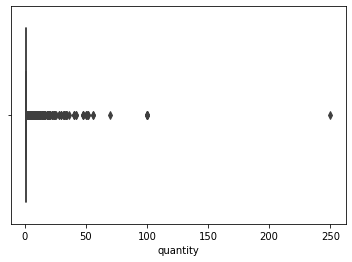

In [43]:
#One of the best plot to check outliers is the boxplot, visually is very clear to idenfify.
sns.boxplot(x=df['quantity']);

In [44]:
#Quantiles also, can support us to find outliers, but in this case, the volum is too low and we are going to use other method
np.quantile(df.quantity, 0.999)

28.12399999999616

In [45]:
#Check outlier with a basic groupby
ratio = df.groupby(['quantity'])['quantity'].count()/len(df)*100
ratio.sort_index(ascending=False).head(10)

quantity
250    0.002130
100    0.010652
70     0.002130
56     0.004261
52     0.004261
51     0.002130
50     0.004261
48     0.006391
42     0.004261
40     0.006391
Name: quantity, dtype: float64

**Definitly 70 units or more represents too low to keep it in the dataframe, so we are goin to drop these rows**

In [46]:
#Dropping Outliers
df = df.drop(df[(df['quantity'] > 70)].index)

In [47]:
df.describe()

,quantity,unit_cost,extended_cost,product_age,year,month,leadtime
count,46933.000000,46933.000000,46933.000000,46933.000000,46933.000000,46933.000000,46933.000000
mean,1.394392,170.359904,178.728567,1723.453263,2019.578612,6.566467,18.336544
std,1.885903,313.790845,336.692229,594.475957,1.133725,3.488258,9.803322
min,1.000000,0.008800,0.010000,251.000000,2018.000000,1.000000,1.000000
25%,1.000000,13.460000,16.000000,1295.000000,2019.000000,3.000000,10.000000
50%,1.000000,68.390000,72.380000,1727.000000,2020.000000,7.000000,18.000000
75%,1.000000,166.260000,174.300000,2146.000000,2021.000000,10.000000,27.000000
max,70.000000,6484.210500,11321.170000,3147.000000,2021.000000,12.000000,35.000000


**Exploring service across years**

In [48]:
#Checking material required across years
df.year.value_counts()

2021    13366
2020    11498
2018    11074
2019    10995
Name: year, dtype: int64

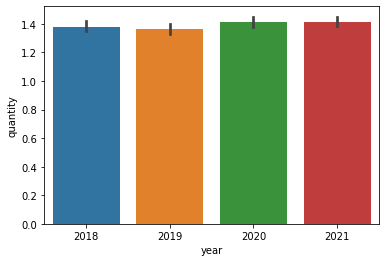

In [49]:
sns.barplot(x=df.year, y=df.quantity);

In [50]:
df.groupby(['year'])['quantity'].agg(['min','max','mean','sum','std'])

,min,max,mean,sum,std
year,,,,,
2018,1,70,1.381885,15303,1.860725
2019,1,56,1.363620,14993,1.843234
2020,1,56,1.414768,16267,1.886419
2021,1,50,1.412539,18880,1.939899


**Exploring Services according to machine**

/Users/talitacoll/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


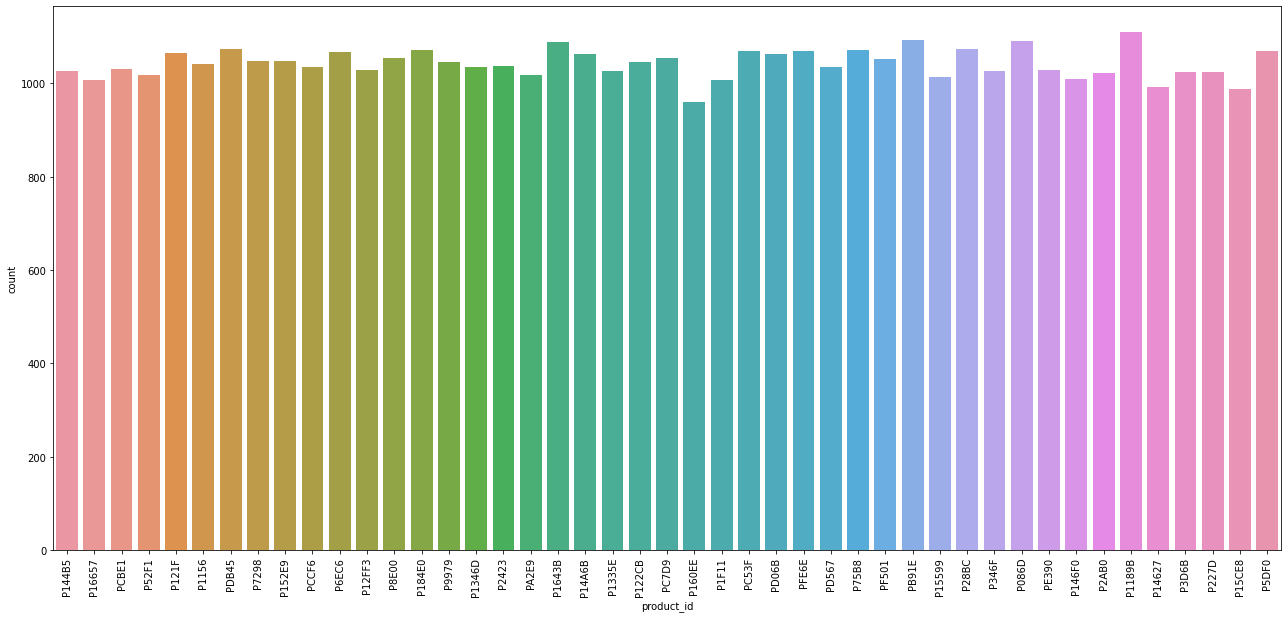

In [51]:
#Show machines where most failure had across years
plt.figure(figsize=(22,10))
sns.countplot(df['product_id'])
plt.xticks(rotation=90)
plt.show()

In [52]:
df.groupby(['product_id'])['quantity'].agg(['min','max','sum','mean','std']).sort_values('sum',ascending=False).head(10)

,min,max,sum,mean,std
product_id,,,,,
P5DF0,1,32,1582,1.478505,2.059681
P75B8,1,40,1576,1.471522,2.287488
P1189B,1,48,1564,1.409009,1.994200
P121F,1,50,1541,1.445591,2.156189
P1643B,1,48,1535,1.410846,2.122589
P9979,1,35,1535,1.468900,2.290293
PC7D9,1,51,1533,1.453081,2.142776
P184E0,1,48,1525,1.423903,2.202706
P28BC,1,32,1510,1.404651,1.648027


**Exploring Services by spare/module**

In [53]:
df.item_type.unique()

array(['SPA', 'MOD'], dtype=object)

In [54]:
#Ratio by model or spare
df.groupby(['item_type'])['quantity'].count()/len(df)*100

item_type
MOD    44.606141
SPA    55.393859
Name: quantity, dtype: float64

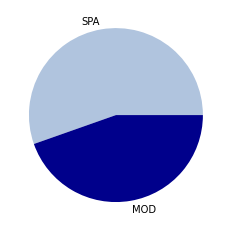

In [55]:
plt.pie(df.item_type.value_counts(),labels=df.item_type.unique(),
       colors=('lightsteelblue','darkblue'));

In [56]:
df.groupby(['item_type'])['quantity'].agg(['min','max','sum','mean','std']).sort_values('sum',ascending=False).head(10)

,min,max,sum,mean,std
item_type,,,,,
SPA,1,70,42938,1.651589,2.443783
MOD,1,34,22505,1.074994,0.610732


In [57]:
df.groupby(['item_type'])['quantity'].sum()

item_type
MOD    22505
SPA    42938
Name: quantity, dtype: int64

**COST EXPLORATION**

In [58]:
#Top 10 services where the cost was the most significative
df.sort_values(by='extended_cost',ascending=False).head(2)

,id,doc_type,transaction_date,order_type,order_date,quantity,unit_cost,extended_cost,item_type,product_id,serial_id,install_date,product_age,year,month,leadtime
index,,,,,,,,,,,,,,,,
164037,S00150A05,D1,2020-03-16,U3,2020-03-09,15,754.7446,11321.17,SPA,PF501,SN0011324,2016-10-26,1230,2020,3,7
70395,M06B7CB,D1,2018-06-29,U1,2018-06-18,4,1655.2400,6620.96,MOD,PD567,SN0001132,2015-09-16,1006,2018,6,11


In [59]:
#Assigning a lambda function to find unit cost
df = df.assign(unit_cost = lambda x: df.extended_cost/df.quantity)
df.head(2)

,id,doc_type,transaction_date,order_type,order_date,quantity,unit_cost,extended_cost,item_type,product_id,serial_id,install_date,product_age,year,month,leadtime
index,,,,,,,,,,,,,,,,
21592,S04ECF605,D1,2021-12-15,U1,2021-12-11,2,1.31,2.62,SPA,P144B5,SN0000928,2016-01-10,2162,2021,12,4
21593,S03D2C47C,D1,2021-12-13,U1,2021-12-02,1,2.99,2.99,SPA,P16657,SN0010734,2015-10-19,2236,2021,12,11


In [60]:
df.groupby(['product_id'])['extended_cost'].agg(['min','max','sum','mean','std']).sort_values('sum',ascending=False).head(10)

,min,max,sum,mean,std
product_id,,,,,
PC53F,0.01,2995.00,213731.78,199.749327,362.632536
P8E00,0.01,5722.06,206671.62,196.083131,392.420391
PF501,0.01,11321.17,197814.73,187.858243,469.415171
PE390,0.01,4068.83,196719.69,191.175598,355.067533
P121F,0.01,3446.00,196292.79,184.139578,338.648951
P184E0,0.01,4420.18,195532.09,182.569645,333.218851
PCBE1,0.01,5447.36,195125.96,189.258933,385.069120
P122CB,0.01,3899.85,194733.53,186.347876,360.417958
P1643B,0.01,2450.54,194516.61,178.783649,322.332371


In [61]:
#Subset only for TOP 20 service cost
dfcm = df.sort_values('extended_cost',ascending=False)[:20]
dfcm.head(2)

,id,doc_type,transaction_date,order_type,order_date,quantity,unit_cost,extended_cost,item_type,product_id,serial_id,install_date,product_age,year,month,leadtime
index,,,,,,,,,,,,,,,,
164037,S00150A05,D1,2020-03-16,U3,2020-03-09,15,754.744667,11321.17,SPA,PF501,SN0011324,2016-10-26,1230,2020,3,7
70395,M06B7CB,D1,2018-06-29,U1,2018-06-18,4,1655.240000,6620.96,MOD,PD567,SN0001132,2015-09-16,1006,2018,6,11


In [62]:
dfcmpivot = df.pivot_table(index='id', columns='year', values = 'extended_cost',aggfunc='sum',fill_value=0)
dfcmpivot.head(2)

year,2018,2019,2020,2021
id,,,,
M000063,70.00,70.0,70.0,70.0
M0001BA,172.73,425.0,340.0,275.0


In [63]:
dfcmpivot=dfcmpivot.sort_values(by=2021,ascending=False)

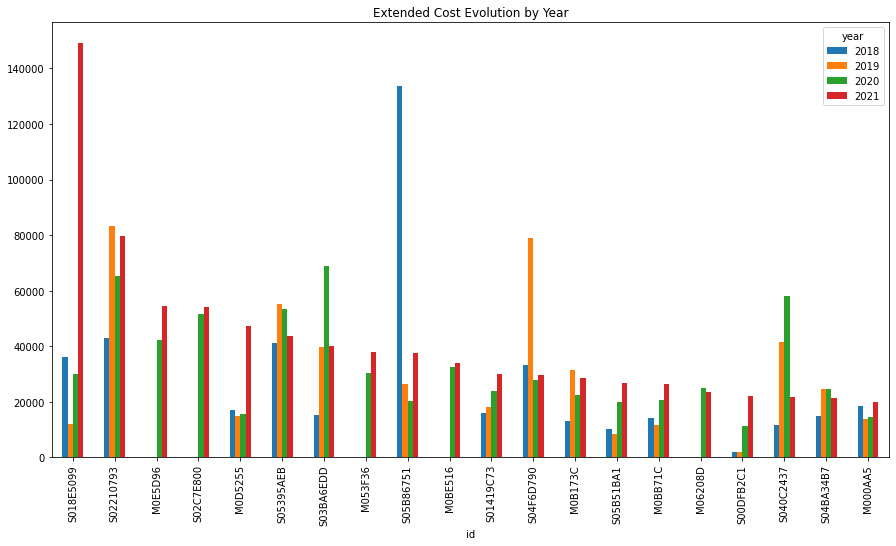

In [64]:
dfcmpivot.iloc[:20].plot(kind='bar',stacked=False,figsize=(15,8))
plt.title('Extended Cost Evolution by Year');

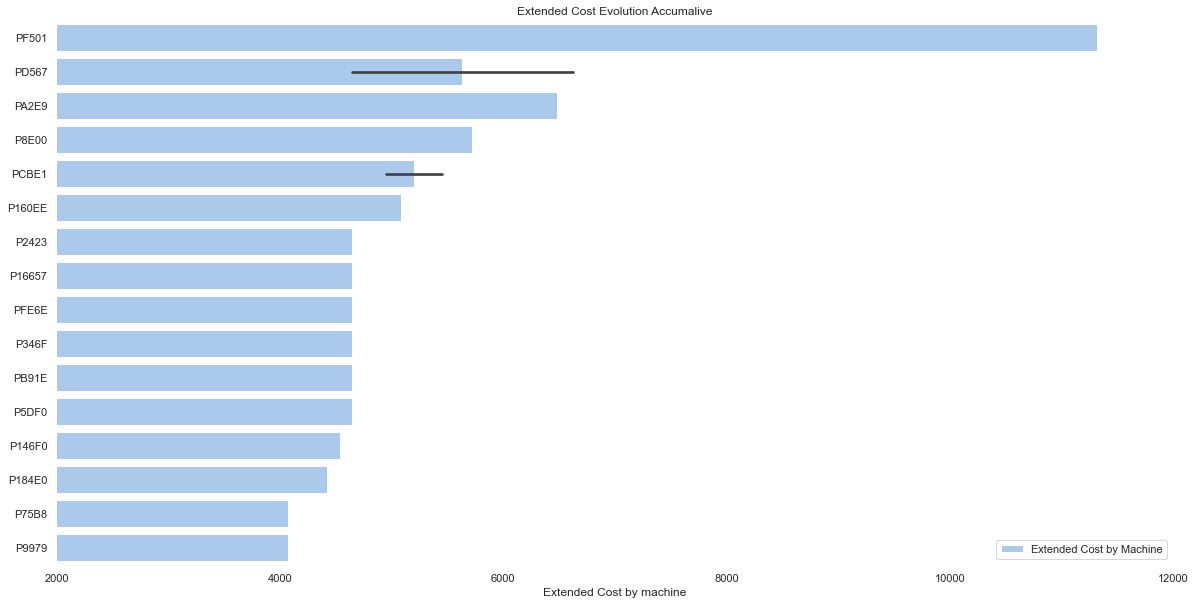

In [65]:
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(20, 10))
sns.set_color_codes("pastel")
sns.barplot(x='extended_cost', y='product_id', data=dfcm,
            label='Extended Cost by Machine', color="b")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(2000, 12000), ylabel="",
       xlabel='Extended Cost by machine')
sns.despine(left=True, bottom=True)
plt.title('Extended Cost Evolution Accumalive');

In [66]:
df.unit_cost.quantile([.2,.8])

0.2      8.20
0.8    224.64
Name: unit_cost, dtype: float64

**EXPLORING LEADTIME BETWEEN SERVICE RELEASED AND SERVICE REQUIRED**

In [67]:
df.head(2)

,id,doc_type,transaction_date,order_type,order_date,quantity,unit_cost,extended_cost,item_type,product_id,serial_id,install_date,product_age,year,month,leadtime
index,,,,,,,,,,,,,,,,
21592,S04ECF605,D1,2021-12-15,U1,2021-12-11,2,1.31,2.62,SPA,P144B5,SN0000928,2016-01-10,2162,2021,12,4
21593,S03D2C47C,D1,2021-12-13,U1,2021-12-02,1,2.99,2.99,SPA,P16657,SN0010734,2015-10-19,2236,2021,12,11


In [68]:
#Create a pivot table for lineplot, excluding, due to months to compare is too low.
ltpivot = df.pivot_table(index='leadtime',columns='year',values='quantity',aggfunc='count')
ltpivot.head(10)

year,2018,2019,2020,2021
leadtime,,,,
1,NaN,NaN,NaN,30.0
2,328.0,324.0,320.0,552.0
3,315.0,301.0,322.0,404.0
4,317.0,282.0,330.0,382.0
5,322.0,352.0,312.0,411.0
6,332.0,329.0,340.0,418.0
7,323.0,312.0,331.0,598.0
8,341.0,347.0,346.0,377.0
9,288.0,318.0,336.0,393.0


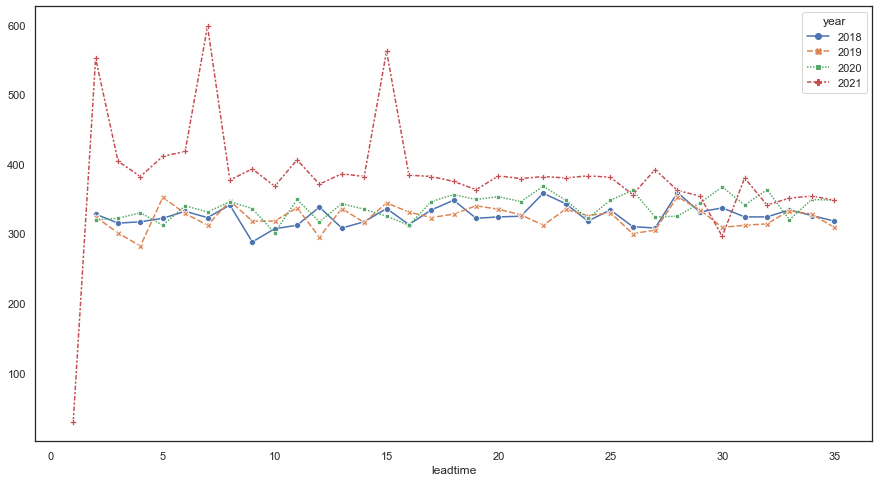

In [69]:
plt.figure(figsize=(15,8))
sns.lineplot(data=ltpivot,markers=True);

In [81]:
df.groupby(['leadtime'])['leadtime'].agg(['count']).sort_values('count',ascending=False).head(10)

,count
leadtime,
15,1567
7,1564
2,1524
22,1420
6,1419
8,1411
18,1407
23,1406
11,1404


In [82]:
dfid = df.groupby(['id'])['leadtime'].agg(['mean','max']).sort_values('max',ascending=False)
dfid.head(2)

,mean,max
id,,
M000063,16.125,35
S0463CC0E,16.500,35


In [83]:
df.sort_values(['leadtime'], axis=0, ascending=False, inplace=True, ignore_index=True, key=None)
df.head()

,id,doc_type,transaction_date,order_type,order_date,quantity,unit_cost,extended_cost,item_type,product_id,serial_id,install_date,product_age,year,month,leadtime
0,S011FEA4C,D1,2020-03-09,U1,2020-02-03,1,201.34,201.34,SPA,P160EE,SN0001489,2015-12-06,1520,2020,2,35
1,S016152AD,D1,2018-10-29,U1,2018-09-24,1,2.14,2.14,SPA,P184E0,SN0009654,2014-04-18,1620,2018,9,35
2,S02E62786,D1,2021-02-24,U1,2021-01-20,1,122.00,122.00,SPA,P14A6B,SN0000520,2013-12-23,2585,2021,1,35
3,S04B84499,D1,2021-03-10,U1,2021-02-03,1,130.00,130.00,SPA,P8E00,SN0002188,2014-10-21,2297,2021,2,35
4,M0865D7,D1,2019-07-10,U1,2019-06-05,2,1.67,3.34,MOD,P121F,SN0006969,2015-03-28,1530,2019,6,35


In [84]:
#Checking quantiles lead time find the goal
q = df.leadtime.quantile([.25, .5, .75])
q

0.25    10.0
0.50    18.0
0.75    27.0
Name: leadtime, dtype: float64

In [85]:
ratiol = df.groupby(['leadtime'])['leadtime'].count()/len(df)*100
ratiol.sort_index(ascending=False).head()

leadtime
35    2.818912
34    2.891356
33    2.850873
32    2.859395
31    2.891356
Name: leadtime, dtype: float64

In [86]:
#checking if there some correlation between leadtime and other features
print('Correlation between leadtime and unit cost is basically null:',df['leadtime'].corr(df['unit_cost']))
print('Correlation between leadtime and quantity is basically null:',df['leadtime'].corr(df['quantity']))

Correlation between leadtime and unit cost is basically null: 0.0022999330103253596
Correlation between leadtime and quantity is basically null: 0.0074930232151198565


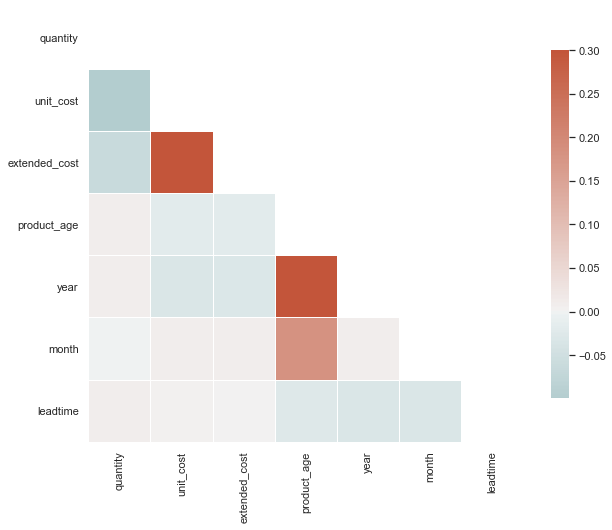

In [87]:
#Checking if there is some correlation in data
sns.set_theme(style='white')
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(200, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': 0.8});

In [104]:
corr

,quantity,unit_cost,extended_cost,product_age,year,month,leadtime
quantity,1.000000,-0.099397,-0.064559,0.007832,0.008549,-0.000270,0.007493
unit_cost,-0.099397,1.000000,0.961951,-0.021085,-0.033297,0.008981,0.002300
extended_cost,-0.064559,0.961951,1.000000,-0.020308,-0.031193,0.008598,0.002003
product_age,0.007832,-0.021085,-0.020308,1.000000,0.698774,0.180212,-0.026241
year,0.008549,-0.033297,-0.031193,0.698774,1.000000,0.006956,-0.032457
month,-0.000270,0.008981,0.008598,0.180212,0.006956,1.000000,-0.032377
leadtime,0.007493,0.002300,0.002003,-0.026241,-0.032457,-0.032377,1.000000


In [94]:
#Creating a dataset to check serial number
dfsn= df.groupby(['serial_id','install_date','year'])['extended_cost'].agg(['min','max','sum','mean','count'])
dfsn.sort_values(by='sum',ascending=False)

,,,min,max,sum,mean,count
serial_id,install_date,year,,,,,
SN0011324,2016-10-26,2020,1.69,11321.17,21560.93,414.633269,52
SN0002526,2016-07-11,2020,1.20,2600.00,17579.23,331.683585,53
SN0004886,2016-04-10,2021,0.48,1900.00,16447.23,278.766610,59
SN0010998,2014-06-19,2019,0.01,2861.03,16123.82,350.517826,46
SN0001848,2014-03-30,2019,0.47,1790.00,16102.92,335.477500,48
...,...,...,...,...,...,...,...
SN0008788,2014-12-30,2018,0.01,579.00,3020.39,88.835000,34
SN0008318,2016-02-23,2018,0.01,360.60,2722.12,80.062353,34
SN0009817,2016-02-23,2020,0.01,390.00,2703.08,81.911515,33


In [95]:
dfsnpivot=df.pivot_table(index='serial_id',columns='year',values='extended_cost',aggfunc='sum',
                         fill_value=0)
dfsnpivot.head(2)

year,2018,2019,2020,2021
serial_id,,,,
SN0000139,4871.87,6801.51,13638.96,7109.26
SN0000140,6431.11,6464.50,6908.67,6206.11


In [96]:
dfsnpivot=dfsnpivot.sort_values(by=2021,ascending=False)

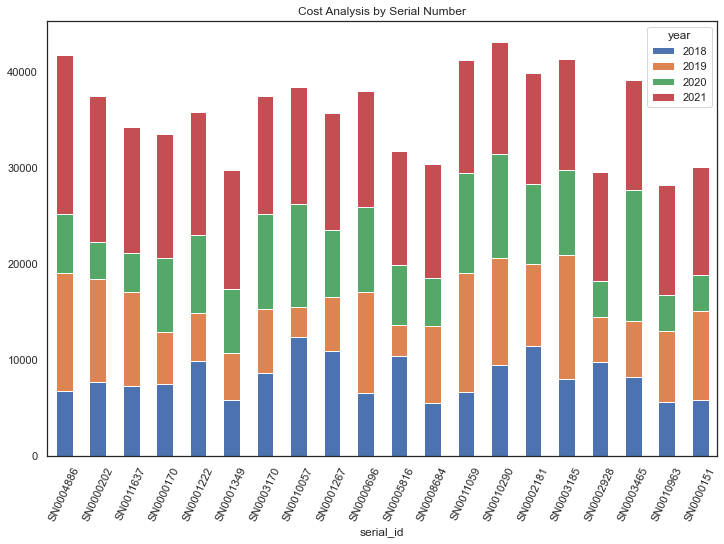

In [97]:
#Analysing TOP 20 serial number with more cost accross years.
dfsnpivot[:20].plot(kind='bar',stacked=True, figsize=(12,8))
plt.xticks(rotation=65)
plt.title('Cost Analysis by Serial Number');

In [103]:
df[df.serial_id == (dfsn.index.get_level_values(0)[0])]['extended_cost'].sum()

32421.6

In [98]:
#Which machine have most failures?
print('- The machine',df.product_id.mode()[0],'is the most problematic, requiring ',
      df.product_id.value_counts().max(),'service along years.')
print('- Along years the spare/module which most change has required is',df.id.mode()[0],
      ', technician changed in customer machines ',df.id.value_counts().max(),'times.')
print('- Serial Number which most service required is',df.serial_id.mode()[0],
      ' summing up',df.serial_id.value_counts().max(),'requests, by other hand, serial with most cost was',
      dfsn.index.get_level_values(0)[0],'suming up a cost of ',round(dfsn['sum'].max()),'USD.')
print('- Year with more requests was',df.year.mode()[0],
      ' summing up',df.year.value_counts().max(),'services.')
print('- Product that most cost had in the same service was:',dfcm.iloc[0,9], ', representing around', 
      dfcm.extended_cost.max(),'USD to operation.')
print(f'- Service released in our target, until 10 days, represents only {round(ratiol[ratiol.index<11].sum())}%.')#' And services with more than 25 days, represents{}'.)

- The machine P1189B is the most problematic, requiring  1110 service along years.
- Along years the spare/module which most change has required is S01419C73 , technician changed in customer machines  1126 times.
- Serial Number which most service required is SN0003203  summing up 222 requests, by other hand, serial with most cost was SN0000139 suming up a cost of  21561 USD.
- Year with more requests was 2021  summing up 13366 services.
- Product that most cost had in the same service was: PF501 , representing around 11321.17 USD to operation.
- Service released in our target, until 10 days, represents only 27%.


In [99]:
df.head()

,id,doc_type,transaction_date,order_type,order_date,quantity,unit_cost,extended_cost,item_type,product_id,serial_id,install_date,product_age,year,month,leadtime
0,S011FEA4C,D1,2020-03-09,U1,2020-02-03,1,201.34,201.34,SPA,P160EE,SN0001489,2015-12-06,1520,2020,2,35
1,S016152AD,D1,2018-10-29,U1,2018-09-24,1,2.14,2.14,SPA,P184E0,SN0009654,2014-04-18,1620,2018,9,35
2,S02E62786,D1,2021-02-24,U1,2021-01-20,1,122.00,122.00,SPA,P14A6B,SN0000520,2013-12-23,2585,2021,1,35
3,S04B84499,D1,2021-03-10,U1,2021-02-03,1,130.00,130.00,SPA,P8E00,SN0002188,2014-10-21,2297,2021,2,35
4,M0865D7,D1,2019-07-10,U1,2019-06-05,2,1.67,3.34,MOD,P121F,SN0006969,2015-03-28,1530,2019,6,35


*Insight*

- Besides the Covid 19 Global situation in 2020, the usage was bigger than previous year.

- From global perspective, standard variation is low.

- Spares usage is almost the doble of modules usage.

- Distribution of failure by product is quite similiar between than.

- The only correclation found was product age with extended cost, because of cummulative cost.

- Leadtime between service released and service required is most commoly be around 22 days, what means the objetive of this project is reduce this leadtime to 10 days.